#    # Week 4 Project on EDA, Statistics and Hypothesis testing
   

### 1: importing necessary directories

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# tells python to actually display the graphs
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore


### 2: Read the data as a data frame

In [73]:
insurance = pd.read_csv("insurance.csv") # reading the csv file

In [5]:
insurance.head() # checking sample data by seeing first 5 rows

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3.a : Know the shape of the data

In [74]:
insurance.shape # gives the shape of the data

(1338, 7)

There are 1338 rows in the dataframe with 7 columns

### 3.b : Know the data type of each attribute

In [12]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Since each of the columns have same number of entries (1338), there is no column containing  any NULL value

### 3.c: Checking the presence of missing values

In [14]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

None of the columns carry null values

### 3.d: Summary of numerical attributes

In [76]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### 3.e: Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

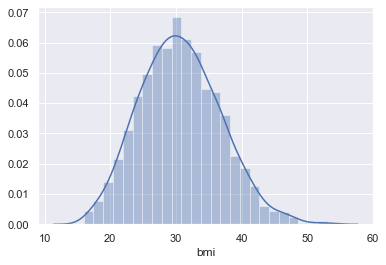

In [19]:
sns.distplot(insurance['bmi'])

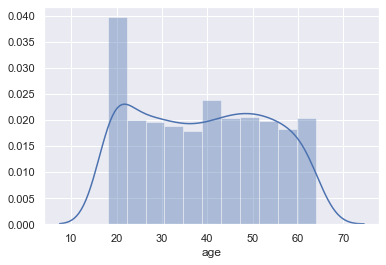

In [20]:
sns.distplot(insurance['age'])

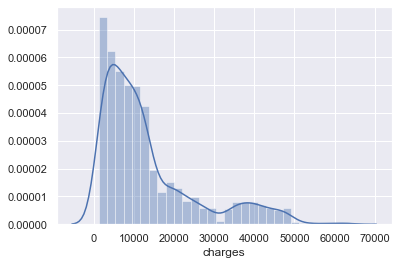

In [21]:
sns.distplot(insurance['charges'])

### 3.f: Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [23]:
insurance.skew(axis = 0, skipna = True) 

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

### 3.g: Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

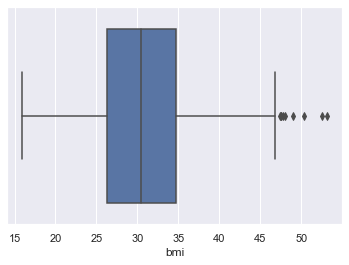

In [24]:
sns.boxplot(x=insurance['bmi'])

Outliers are present in the right which are higher in value than the maximum value in the fourth quartile 

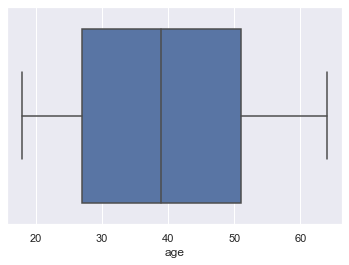

In [25]:
sns.boxplot(x=insurance['age'])

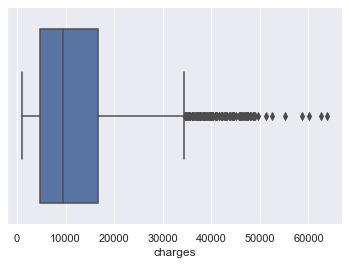

In [27]:
sns.boxplot(x=insurance['charges'])

### 3.h: Distribution of categorical columns (include children)

Categorical variables include: sex, children, smoker, region

Plotting Frequency distribution of males and females in the sample

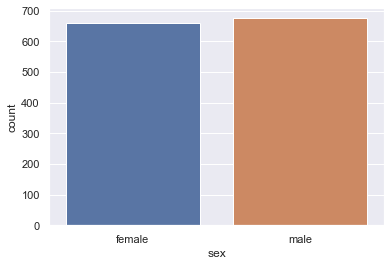

In [28]:
sns.countplot(insurance['sex']); #Frequency distribution of males and females in the sample



Plotting Frequency distribution of people with children (0-5) in the sample

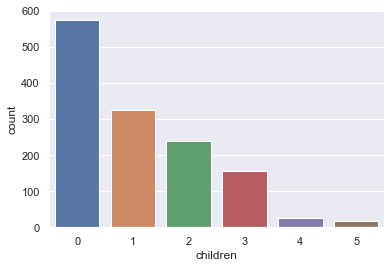

In [38]:
sns.countplot(insurance['children']); #Frequency distribution of people with children (0-5) in the sample

Plotting frequeny distribution of smokers and non-smokers in the sample

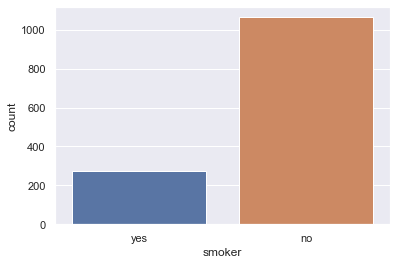

In [32]:
sns.countplot(insurance['smoker']); #Frequency distribution of smokers and non-smokers in the sample

Frequency distribution of people across four regions(southwest, southeast, northwest, northeast) in the sample

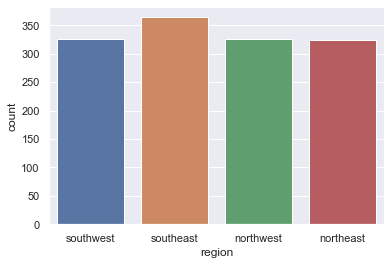

In [40]:
sns.countplot(insurance['region']); #Frequency distribution of people across four regions(southwest, southeast, northwest, northeast) in the sample

Frequency distribution of males and females based on their smoking patterns

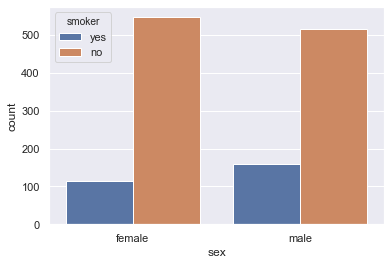

In [41]:
sns.countplot(insurance['sex'], hue=insurance['smoker']);  

Frequency distribution of smokers based on regions

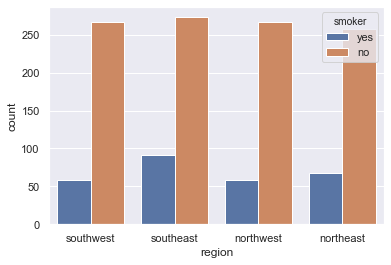

In [42]:
sns.countplot(insurance['region'], hue=insurance['smoker']);  

### 3.i: Pair plot that includes all the columns of the data frame

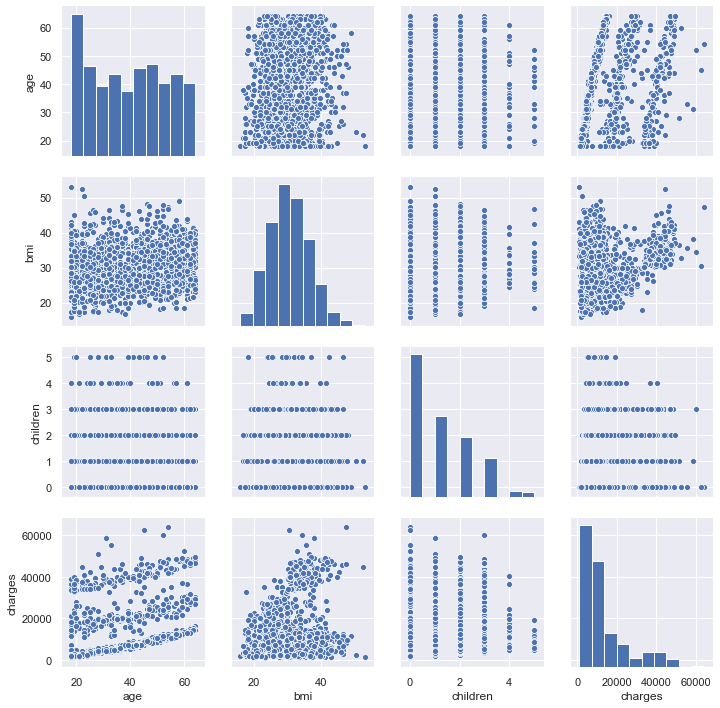

In [44]:

sns.pairplot(insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]);

## Statistical evidence based answering

### 4.a: Do charges of people who smoke differ significantly from the people who don't?

Ans. 4.a)

H0 = Charges for both smokers and non-smokers remain same

Ha = Charges for smokers differ significantly from non smokers

Let's take level of significance (alpha) = 0.05

Let's segregate the sample into two sets x1 and x2 for smokers and non-smokers data  

Let x1_bar be the mean of charges for smokers and x2_bar be the mean of charges for non-smokers

Hence,

H0: x1_bar - x2_bar = 0

Ha: x1_bar - x2_bar != 0

Therefore, this is a two-tailed test.

In [52]:
x1 = insurance.charges[insurance.smoker == 'yes'] # preparing x1 dataframe for smokers' data 

In [53]:
x2 = insurance.charges[insurance.smoker == 'no'] # preparing x2 dataframe for non-smokers' data 

In [54]:
x1.head()

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

In [55]:
x2.head()

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [56]:
x1_bar = x1.mean() # Calculating means of x1 and x2 samples
print('x1_bar: '+str(x1_bar))
x2_bar = x2.mean()
print('x2_bar: '+str(x2_bar))

x1_bar: 32050.23183153285
x2_bar: 8434.268297856199


In [64]:
t,p = stats.ttest_ind(x1,x2, equal_var=True) # Calculating t statistics and p values for a two-tailed test 
print('t statistic: '+str(t)+' and p value: '+str(p))

t statistic: 46.664921172723716 and p value: 8.271435842177219e-283


In [65]:
print('degrees of freedom: '+str(x1.count() + x2.count()-2)) # Calculating degrees of freedom

degrees of freedom: 1336


In [71]:
print('t critical: '+str(stats.t.ppf(q=1-.05/2,df=1336))) # Calculating t-critical value

t critical: 1.9617412190546957


Since t-statistic is greater than t-critical, we reject the null hypothesis
Hence, there is a significant difference in insurance charges between smokers and non-smokers 

### 4.b: Does bmi of males differ significantly from that of females?

Ans. 4.b)

H0 = BMI for both males and females remain same

Ha = BMI for males differ significantly from females

Let's take level of significance (alpha) = 0.05

Let's segregate the sample into two sets y1 and y2 for males and females data  

Let y1_bar be the mean of bmi for males and y2_bar be the mean of bmi for females

Hence,

H0: y1_bar - y2_bar = 0

Ha: y1_bar - y2_bar != 0

Therefore, this is a two-tailed test.

In [77]:
y1 = insurance.bmi[insurance.sex == 'male'] # preparing y1 dataframe for bmi data for males 

In [78]:
y2 = insurance.bmi[insurance.sex == 'female'] # preparing y2 dataframe for bmi data for females 

In [80]:
y1.head()

1    33.770
2    33.000
3    22.705
4    28.880
8    29.830
Name: bmi, dtype: float64

In [81]:
y2.head()

0    27.90
5    25.74
6    33.44
7    27.74
9    25.84
Name: bmi, dtype: float64

In [82]:
y1_bar = y1.mean() # Calculating means of y1 and y2 samples
print('y1_bar: '+str(y1_bar))
y2_bar = y2.mean()
print('y2_bar: '+str(y2_bar))

y1_bar: 30.943128698224832
y2_bar: 30.377749244713023


In [83]:
t2,p2 = stats.ttest_ind(y1,y2, equal_var=True) # Calculating t statistics and p values for a two-tailed test 
print('t statistic: '+str(t2)+' and p value: '+str(p2))

t statistic: 1.696752635752224 and p value: 0.08997637178984932


In [84]:
print('degrees of freedom: '+str(y1.count() + y2.count()-2)) # Calculating degrees of freedom

degrees of freedom: 1336


In [85]:
print('t critical: '+str(stats.t.ppf(q=1-.05/2,df=1336))) # Calculating t-critical value

t critical: 1.9617412190546957


Since t-statistic is lesser than t-critical, we fail to reject the null hypothesis.
Hence, BMI for males and females doesn't differ significanlty

### 4.c: Is the proportion of smokers significantly different in different genders?

We need to compare whether proportion of smokers in males is significantly different that the proportion in females

We can use z test for proprotions for this. 

First we will count the total males, total females and then we will count males who are smokers and similarly count of females who are smokers.

Then we will calculate the tow proportions and apply z test of proportions for the determination

Let,

males = count of males,

females = count of females,

smoker_males = count of male smokers

smoker_females = count of female smokers

Null hypothesis H0: Proportion of males who smoke is equal to that of females who smoke

Alternate hypo  Ha: Proportion of males who smoke is different than that of females who smoke

Level of significance (alpha) = 0.05

In [87]:
males = insurance.sex.value_counts()['male'] # Finding count of males
print('Count of males: '+ str(males));

Count of males: 676


In [88]:
females = insurance.sex.value_counts()['female'] # Finding count of females
print('Count of females: '+ str(females));

Count of females: 662


In [89]:
smoker_males = insurance.smoker[insurance.sex == 'male'].value_counts()['yes'] # Finding count of males who smoke
print('Count of males who smoke: '+ str(smoker_males));

Count of males who smoke: 159


In [90]:
smoker_females = insurance.smoker[insurance.sex == 'female'].value_counts()['yes'] # Finding count of females who smoke
print('Count of females who smoke: '+ str(smoker_females));

Count of females who smoke: 115


In [91]:
prop_1 = smoker_males/males # calculating proportion of males who smoke
print('Proportion of males who smoke: '+ str(prop_1))

Proportion of males who smoke: 0.23520710059171598


In [92]:
prop_2 = smoker_females/females # calculating proportion of females who smoke
print('Proportion of females who smoke: '+ str(prop_2))

Proportion of females who smoke: 0.17371601208459214


In [94]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([smoker_males, smoker_females], [males, females])

if p_value <= 0.05:
    print(f'Since the p-value, {round(p_value, 3)} < {0.05} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {0.05} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

Since the p-value, 0.005 < 0.05 (alpha) the difference is significant and we reject the Null hypothesis


Hence, proportion of smokers is significantly different in different genders

### 4.d: Is the distribution of bmi across women with no children, one child and two children, the same?

We need to determine whether distribution of BMI data of women with no children, one child and two children, the same

We can use one-way anova test to compare three distributions 

First we will segrgate the distributions into 3 arrays of women with no children, one child and two children. Then we will apply one-way anova test for comparison.

Let,

No_children = array for BMI data of women with no children,

One_child = array for BMI data of women with one child,

Two_children = array for BMI data of women with two children

Null hypothesis H0: There is equal distribution of bmi across women with no children, one child and two children, 

Alternate hypo  Ha: BMI distribution is different across women with no children, one child and two children

Level of significance (alpha) = 0.05

In [100]:
No_children = insurance.bmi[insurance.sex == 'female'][insurance.children == 0]

In [102]:
No_children.count()

289

In [106]:
One_child = insurance.bmi[insurance.sex == 'female'][insurance.children == 1]

In [107]:
One_child.count()

158

In [105]:
Two_child = insurance.bmi[insurance.sex == 'female'][insurance.children == 2]

In [108]:
Two_child.count()

119

In [110]:
from scipy.stats import f_oneway


stat, p_value = f_oneway(No_children, One_child, Two_child)

if p_value <= 0.05:
    print(f'Since the p-value, {round(p_value, 3)} < {0.05} (alpha) the difference is significant and we reject the Null hypothesis')
else:
    print(f'''\t Since the p-value, {round(p_value,3)} > {0.05} (alpha) the difference is not significant and,
    \t we fail to reject the Null hypothesis''')

	 Since the p-value, 0.716 > 0.05 (alpha) the difference is not significant and,
    	 we fail to reject the Null hypothesis


Hence, there is equal distribution of bmi across women with no children, one child and two children (with a 0.05 level of significance)